In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_array = cv2.imread("/content/drive/MyDrive/FER2013/train/0/Training_3908.jpg")

In [ ]:
img_array.shape

(48, 48, 3)

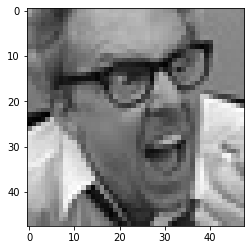

In [ ]:
plt.imshow(img_array)

In [ ]:
datadirectory = "/content/drive/MyDrive/FER2013/train/"

In [ ]:
classes = ["0","1","2","3","4","5","6"]   ## LIST OF CLASSES

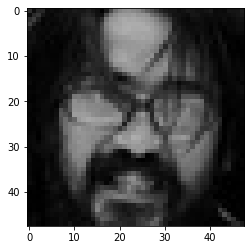

In [ ]:
for category in classes:
  path = os.path.join(datadirectory , category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break  

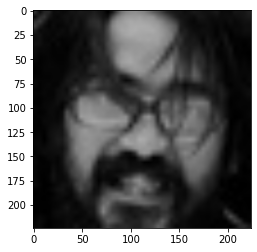

In [ ]:
img_size = 224    #CHANGED THE SIZE FROM 48 X 48 TO 224 X 224 WHICH IS ACCEPTED BY TRANSFER LEARNING MODEL 
new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape

(224, 224, 3)

NOW READING ALL THE IMAGES AND CONVERTING THEM TO ARRAY

In [ ]:
training_data = []
def create_training_Data():
  for category in classes:
    path = os.path.join(datadirectory , category)
    class_num = classes.index(category)   #Labeling or indexing
    for img in os.listdir(path):
       try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array,(img_size , img_size))
            training_data.append([new_array , class_num])
       except Exception as e:
            pass  

In [ ]:
create_training_Data()

In [ ]:
print(len(training_data))

11774


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
print(len((training_data)))

11774


In [ ]:
x = []  # data / feature
y = [] #label / numbering

for features,label in training_data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)  ## coverting x array to 4 Dimension array. because we are USING deep learning architecture such as mobileNet which takes 4D images 


In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape


(11774, 224, 224, 3)

In [ ]:
X= np.array(x)
Y= np.array(y)

#DEEP LEARNING MODEL FOR TRAINING - TRANSFER LEARNING

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.MobileNetV2()     ##mobileNet is a pre-trained model

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

# TRANSFER LEARNING - TUNING , WEIGHTS WILL START FROM LAST CHECK POINT

In [ ]:
base_input = model.layers[0].input    ##input layer

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output   ##last row was deleted, coz they were unneccessary

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output = layers.Dense(128)(base_output)   ## global pooling layer.
## adding new layer after the output of global pooling layer.
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)   ## Classification layer
    ## output layer

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
new_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [31]:
# new_model.fit(x,y,epochs = 25)    ##TRAINING


history = new_model.fit(X, Y, batch_size=32, epochs=9, validation_split=0.1)

Epoch 1/9
332/332 [==============================] - 1121s 3s/step - loss: 0.8519 - accuracy: 0.6397 - val_loss: 4.6490 - val_accuracy: 0.3981
Epoch 2/9
332/332 [==============================] - 1119s 3s/step - loss: 0.6879 - accuracy: 0.7168 - val_loss: 2.2781 - val_accuracy: 0.4635
Epoch 3/9
332/332 [==============================] - 1089s 3s/step - loss: 0.6163 - accuracy: 0.7516 - val_loss: 2.1814 - val_accuracy: 0.3786
Epoch 4/9
332/332 [==============================] - 1123s 3s/step - loss: 0.5566 - accuracy: 0.7736 - val_loss: 3.8357 - val_accuracy: 0.3735
Epoch 5/9
332/332 [==============================] - 1112s 3s/step - loss: 0.5094 - accuracy: 0.7951 - val_loss: 1.8858 - val_accuracy: 0.4321
Epoch 6/9
332/332 [==============================] - 1150s 3s/step - loss: 0.4668 - accuracy: 0.8178 - val_loss: 1.5960 - val_accuracy: 0.4839
Epoch 7/9
332/332 [==============================] - 1158s 3s/step - loss: 0.4260 - accuracy: 0.8336 - val_loss: 2.0453 - val_accuracy: 0.3065

In [34]:
new_model.save('final_model_95p07.h5')

In [ ]:
new_model = tf.keras.models.load_model('final_model_95p07.h5')

In [71]:
frame=cv2.imread("11.jpg")

In [72]:
frame = np.array(frame)

In [73]:
frame.shape

()

In [75]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

error: ignored

In [76]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [77]:
gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

error: ignored

In [78]:
gray.shape


NameError: ignored

In [79]:
faces =faceCascade.detectMultiScale(gray,1.1,4)  ##open cv code, find all possible faces in a photo, and can also detect multiple faces
for x,y,w,h in faces:
    roi_gray =gray[y:y+h,x:x+w]
    roi_color =frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w,y+h), (225,0,0), 2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(faces) ==0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi =roi_color[ey: ey+eh, ex:ex +ew]


NameError: ignored

In [80]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

error: ignored

In [81]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

NameError: ignored

In [82]:
final_image=cv2.resize(face_roi,(224,224))  ##face_roi is rgb
final_image =np.expand_dims(final_image,axis=0)  #need 4th dimensions

NameError: ignored

In [83]:
Predictions=new_model.predict(final_image)

NameError: ignored

In [84]:
Predictions[0]


NameError: ignored